## CSE-221710301035-M.krishna vikas

Objective
- This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).

   ## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [4]:
from sklearn.metrics import classification_report,confusion_matrix

In [5]:
pwd

'C:\\Users\\Raghavendra\\Downloads\\summer internship\\PANDAS'

In [6]:
df=pd.read_csv('C:\\Users\\Raghavendra\\Downloads\\summer internship\\PANDAS\\voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [7]:
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [8]:
df.describe()


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


In [10]:
df["label"] = le.fit_transform(df["label"])
le.classes_

array(['female', 'male'], dtype=object)

Search Results
Featured snippet from the web
LabelEncoder.It Encode target labels with value between 0 and n_classes-1. This transformer should be used to encode target values

### VISUALIZATION

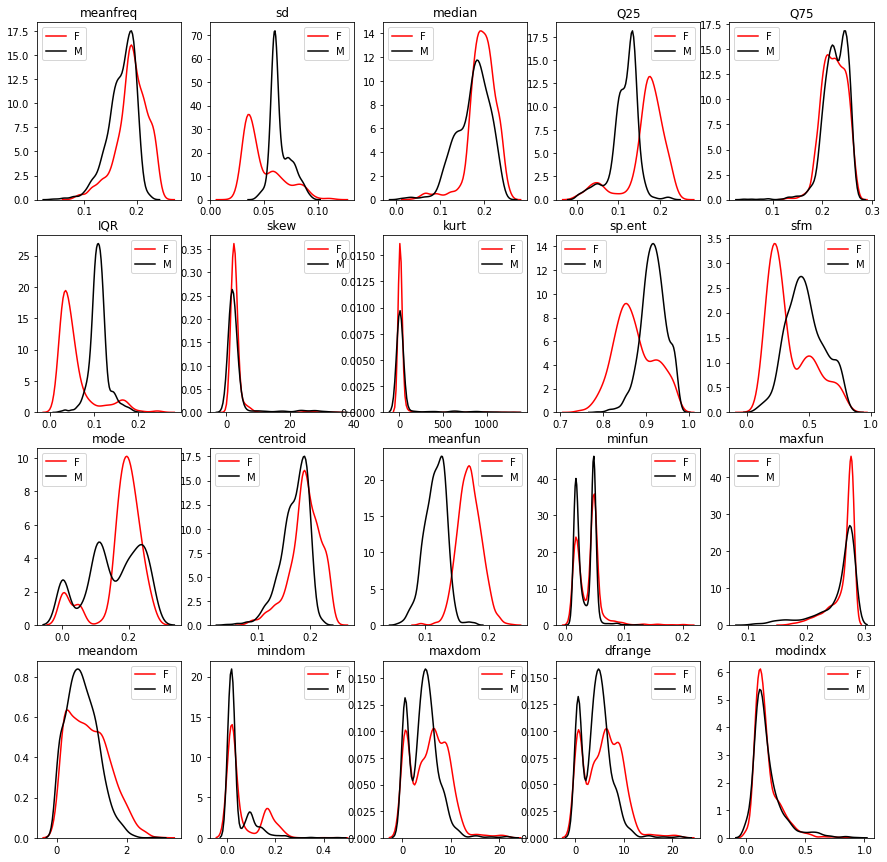

In [11]:
##visulizations for input columns

import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(4,5,figsize=(15,15))
for i in range(1,21):
    plt.subplot(4,5,i)
    plt.title(df.columns[i-1])
    sns.kdeplot(df.loc[df['label'] == 0, df.columns[i-1]], color= 'red', label='F')
    sns.kdeplot(df.loc[df['label'] == 1, df.columns[i-1]], color= 'black', label='M')

1    1584
0    1584
Name: label, dtype: int64


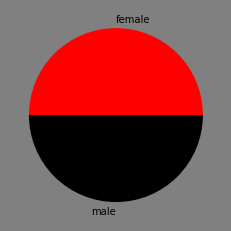

In [12]:
##visulizations for output columns

fig = plt.figure()
fig.patch.set_facecolor('gray')
dm=df[df.columns[-1]]
plt.pie(dm.value_counts(),colors=['red','black'],labels=['female','male'])
print(df['label'].value_counts())
plt.show()

In [13]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

No null values in the Dataset

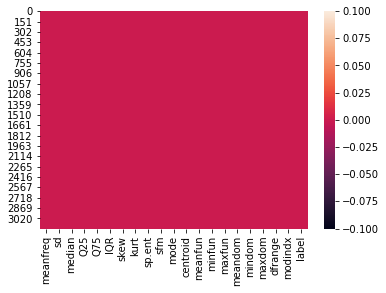

In [14]:
sns.heatmap(df.isnull())

In [15]:
df['label'].value_counts()

1    1584
0    1584
Name: label, dtype: int64

Visualising the null values by using Heatmap

### Data Splitting Functions:
- To measure if the model is good enough, we can use a method called Train/Test.

### What is Train/Test
- Train/Test is a method to measure the accuracy of your model.

- It is called Train/Test because you split the the data set into two sets: a training set and a testing set.

In [16]:
## splitting the data set into input and output

X=df.drop('label',axis=1)
y=df.label

In [17]:
## train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.3,random_state=1)


In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2217, 20)
(951, 20)
(2217,)
(951,)


In [19]:
# Scaling data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

# Scaling for training data
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
scaled_X_train

# Scaling for test data
scaled_X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
scaled_X_test

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.887831,-1.527718,0.650140,0.989263,-0.070548,-1.166548,0.066901,-0.133503,-1.749228,-1.289718,0.263220,0.887831,0.830020,0.604039,0.562108,1.724249,-0.462409,1.980526,1.989485,-0.709717
1,-1.057552,1.588337,-0.005509,-1.551127,-0.388230,1.550129,-0.167638,-0.185296,1.374063,1.754198,0.620363,-1.057552,1.382177,0.769401,0.562108,-0.421545,-0.708087,-0.461162,-0.448542,0.243924
2,-0.988005,1.753716,-0.044330,-1.627071,-0.139488,1.775760,-0.355221,-0.227186,1.421454,1.711299,0.536665,-0.988005,1.399821,0.296987,-0.537999,-1.004313,-0.585248,-1.185035,-1.174857,0.572440
3,0.137304,-1.033211,-0.021988,0.812211,-1.209282,-1.601654,0.654460,0.062778,-1.849733,-0.700869,0.190166,0.137304,1.339029,7.629805,0.625135,-0.777038,2.009721,-1.209108,-1.245717,3.925858
4,1.255174,-1.422769,0.920284,1.245993,0.671619,-1.043998,-0.264334,-0.223090,-1.347887,-1.364525,0.417553,1.255174,1.385288,0.624574,0.510246,-0.085234,-0.462409,1.582064,1.590897,-1.056999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,-0.995784,1.064234,-1.263562,-0.504323,-0.193179,0.466555,-0.066152,-0.179980,0.536553,1.137770,-0.292549,-0.995784,-0.585573,-0.589815,-0.657040,-1.279629,-0.585248,-1.293505,-1.283362,-0.168679
947,-1.645835,1.679386,-1.547439,-1.832962,-0.606989,1.748892,-0.461132,-0.238560,1.696012,2.052945,-2.070959,-1.645835,-0.652405,-1.098675,0.562108,-0.707456,-0.708087,-0.587341,-0.574762,0.204250
948,-0.990942,0.986033,-1.101013,-0.849760,-0.208012,0.851826,-0.299324,-0.222698,1.373419,1.619105,-0.755908,-0.990942,-1.035168,-1.056308,0.259579,-0.632288,-0.708087,0.205156,0.217985,-0.592891
949,-0.412599,0.060471,-0.066591,-0.602373,-0.298317,0.519470,-0.365653,-0.231194,0.708954,0.221225,0.246670,-0.412599,-1.343864,-0.982641,0.259579,-0.665295,0.765978,-0.312845,-0.326752,-0.844914


### K-Nearest Neighbors 

- the k-nearest neighbors algorithm (k-NN) is a non-parametric used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. ... In k-NN classification, the output is a class membership

In [20]:
## model building
# Scaling data
from sklearn.neighbors import KNeighborsClassifier
Knn=KNeighborsClassifier(n_neighbors=6,metric='euclidean')

## apply the knn object on the dataset(training phase)
Knn.fit(scaled_X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

In [21]:

y_train_pred=Knn.predict(scaled_X_train)
y_train_pred

array([0, 1, 0, ..., 1, 1, 1])

#### Checking for optimum k-value
#### Build the models with multiple k values

In [22]:


from sklearn.metrics import accuracy_score

scores=[]
for k in range(1,20):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)
    pred_test = knn_model.predict(scaled_X_test)
    scores.append(accuracy_score(y_test, pred_test))
scores


[0.9737118822292324,
 0.9684542586750788,
 0.9747634069400631,
 0.9695057833859095,
 0.9737118822292324,
 0.9747634069400631,
 0.9705573080967402,
 0.9716088328075709,
 0.9705573080967402,
 0.9674027339642481,
 0.9674027339642481,
 0.9674027339642481,
 0.9695057833859095,
 0.9652996845425867,
 0.9652996845425867,
 0.964248159831756,
 0.9631966351209253,
 0.9621451104100947,
 0.964248159831756]

Text(0, 0.5, 'scores')

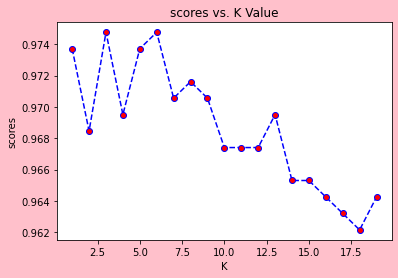

In [23]:
fig = plt.figure()
fig.patch.set_facecolor('pink')
plt.plot(range(1,20),scores,marker='o',markerfacecolor='r',linestyle='--',color='blue')
plt.title('scores vs. K Value')
plt.xlabel('K')
plt.ylabel('scores')

In [24]:

final_model=KNeighborsClassifier(n_neighbors=i,metric='euclidean')
final_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=20)

In [25]:
## prediction on training data
final_train_pred=final_model.predict(scaled_X_train)
final_train_pred

array([0, 1, 0, ..., 1, 1, 1])

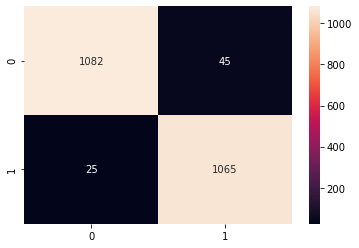

In [26]:
from sklearn.metrics import confusion_matrix,classification_report
sns.heatmap(confusion_matrix(y_train,final_train_pred),annot=True,fmt='d')

In [27]:
## classification report
print(classification_report(y_train,final_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1127
           1       0.96      0.98      0.97      1090

    accuracy                           0.97      2217
   macro avg       0.97      0.97      0.97      2217
weighted avg       0.97      0.97      0.97      2217



In [28]:
## prediction on test data
final_test_pred=final_model.predict(scaled_X_test)
final_test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,

In [29]:
## classification report
print(classification_report(y_test,final_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       457
           1       0.96      0.98      0.97       494

    accuracy                           0.96       951
   macro avg       0.96      0.96      0.96       951
weighted avg       0.96      0.96      0.96       951



In [30]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn_model,X_train,y_train,cv=5)

array([0.68018018, 0.68918919, 0.68623025, 0.73137698, 0.69751693])

In [31]:
knn_model.predict_proba(X_test)

array([[0.57894737, 0.42105263],
       [0.        , 1.        ],
       [0.05263158, 0.94736842],
       ...,
       [0.52631579, 0.47368421],
       [0.42105263, 0.57894737],
       [0.52631579, 0.47368421]])

In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc_auc = roc_auc_score(y_test,knn_model.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,knn_model.predict_proba(X_test) [:,1])


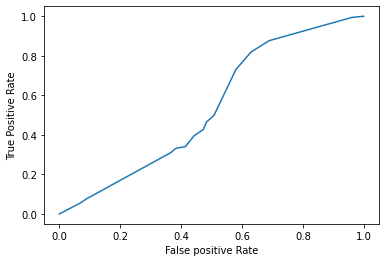

In [33]:
plt.figure()
plt.plot(fpr,tpr,roc_auc)
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


In [34]:
roc_auc

0.4951585325879924

## DECISION TREE

- A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning.
- This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.

In [35]:
## decision tree
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [36]:
## pred on training data
y_train_pred1=dtc.predict(X_train)
y_train_pred1

array([0, 1, 0, ..., 1, 1, 1])

In [37]:
y_train_pred1=dtc.predict(X_test)
y_train_pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,

In [38]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1127
           1       0.99      0.98      0.98      1090

    accuracy                           0.98      2217
   macro avg       0.98      0.98      0.98      2217
weighted avg       0.98      0.98      0.98      2217



In [39]:
confusion_matrix(y_train,y_train_pred)

array([[1112,   15],
       [  22, 1068]], dtype=int64)

In [40]:
## prediction on test data
y_test_pred=dtc.predict(X_test)

## compare the actual y_test values and y_test_pred values
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       457
           1       0.98      0.98      0.98       494

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951



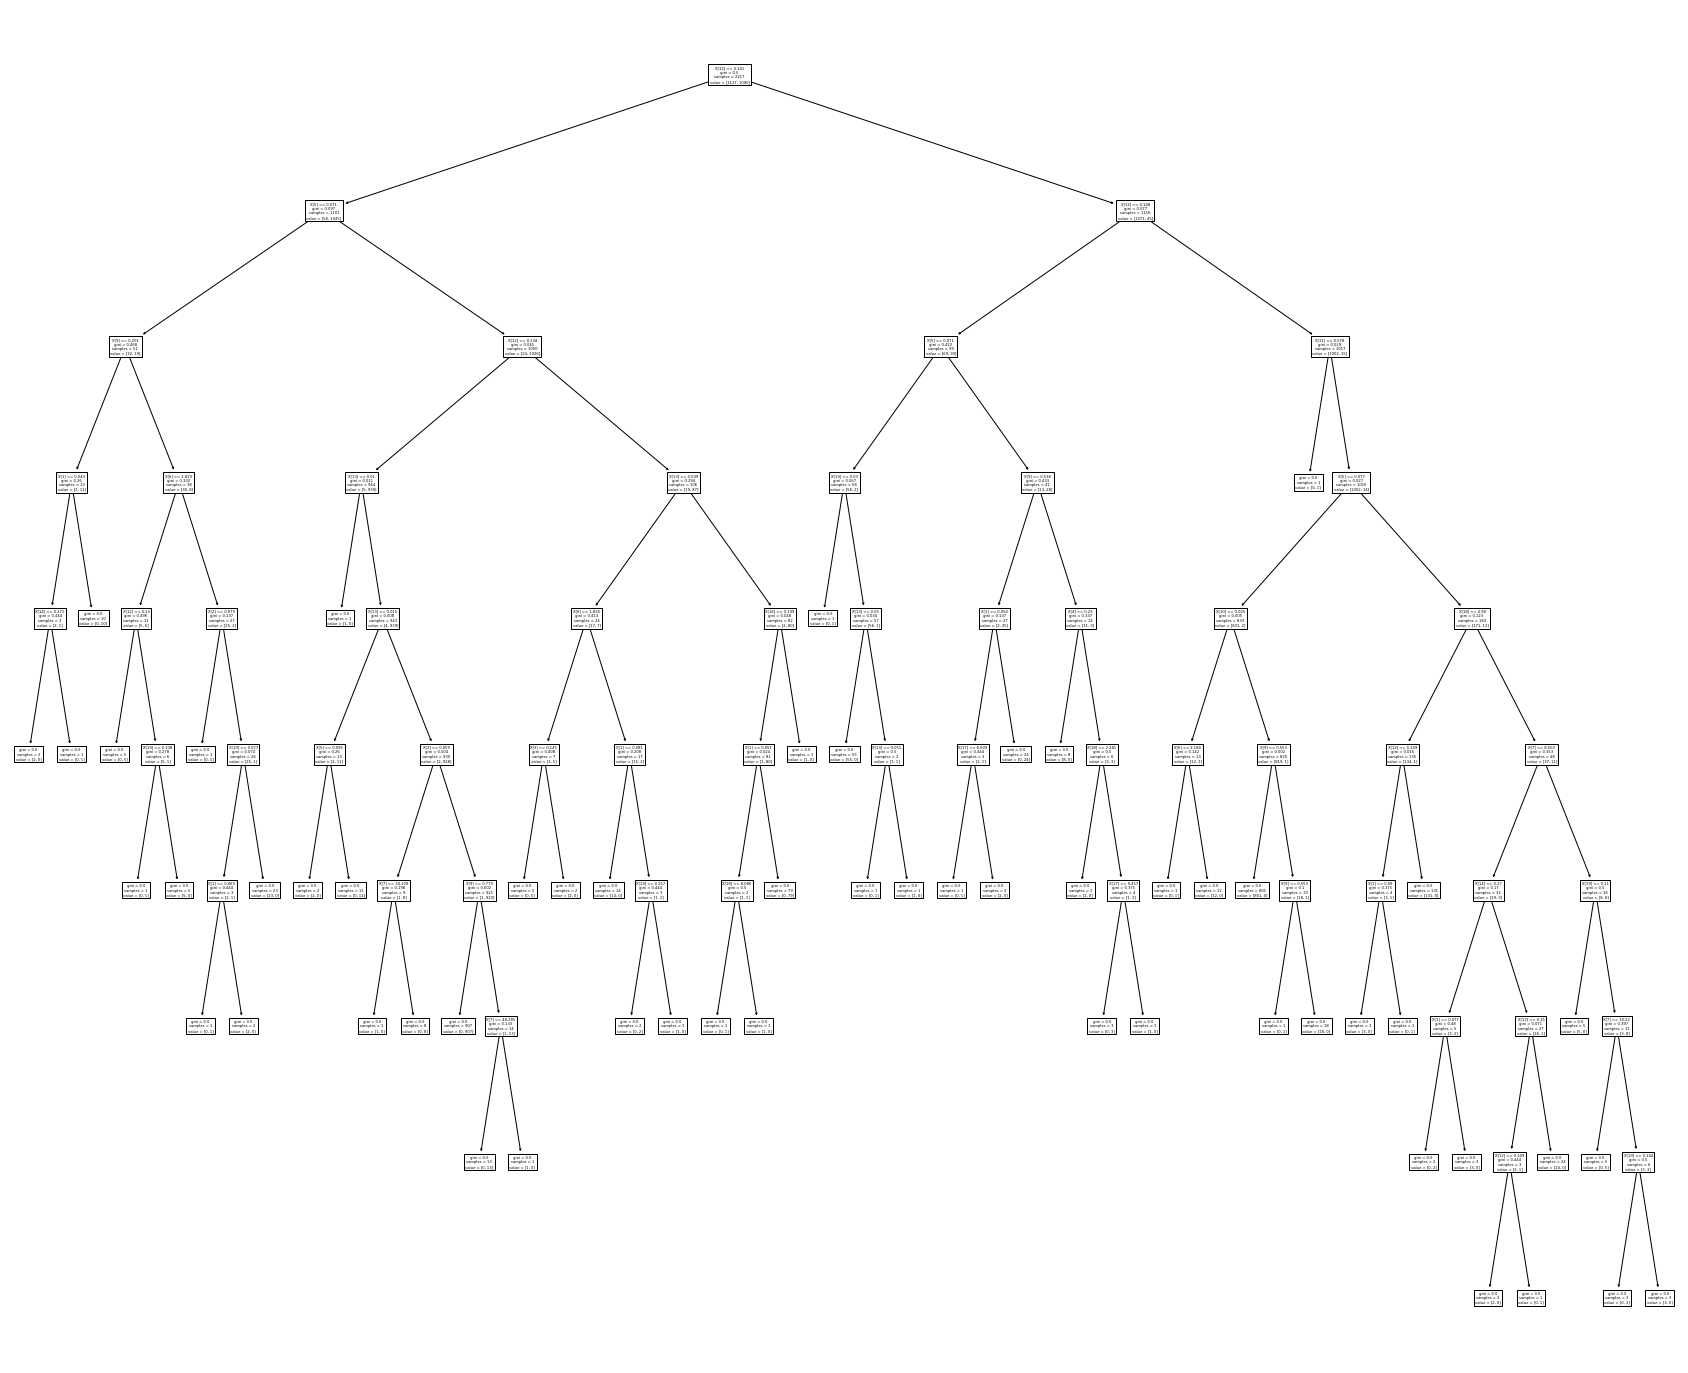

In [41]:
## visuilization 
from sklearn import tree
clf=tree.DecisionTreeClassifier(criterion='entropy')
plt.figure(figsize=(30,25))
tree.plot_tree(dtc)
plt.show()

In [86]:

from sklearn.model_selection import cross_val_score
cross_val_score(dtc,X_train,y_train,cv=5)

array([0.96171171, 0.94369369, 0.97065463, 0.98194131, 0.95711061])

### GridSearch CV
- Grid-searching is the process of scanning the data to configure optimal parameters for a given model. Depending on the type of model utilized, certain parameters are necessary. Grid-searching does NOT only apply to one model type. It is important to note that Grid-searching can be extremely computationally expensive and may take your machine quite a long time to run. Grid-Search will build a model on each parameter combination possible.
- It iterates through every parameter combination and stores a model for each combination. Without further ado, lets jump into some examples and implementation

In [43]:
## hyper parameters
## Gridsearch-->find optimum parameters
grid_param={"criterion":['gini','entropy'],
            'max_depth' :range(2,32,1),
            'min_samples_leaf':range(1,10,1)}


In [44]:
from sklearn.model_selection import GridSearchCV

## intilization
grid_search=GridSearchCV(estimator=dtc,param_grid=grid_param,cv=5)

##applying gridsearch onto dataset
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10)})

In [45]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 28, 'min_samples_leaf': 2}

In [46]:
## we have to build the model with best paramters
##initialze the DT clssifier

clf=DecisionTreeClassifier(criterion='gini', max_depth=28, min_samples_leaf=2)

## we need to fit the model of the data
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=28, min_samples_leaf=2)

In [47]:
## prediction on train data
pred_train=clf.predict(X_train)

## compare the actual y_test values and pred_test after grid search
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1127
           1       1.00      0.99      0.99      1090

    accuracy                           0.99      2217
   macro avg       0.99      0.99      0.99      2217
weighted avg       0.99      0.99      0.99      2217



In [48]:
## prediction on test data
pred_test=clf.predict(X_test)

## compare the actual y_test values and pred_test after grid search
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       457
           1       0.98      0.97      0.97       494

    accuracy                           0.97       951
   macro avg       0.97      0.97      0.97       951
weighted avg       0.97      0.97      0.97       951



In [49]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf,X_train,y_train,cv=5)

array([0.96621622, 0.94144144, 0.96613995, 0.97968397, 0.95936795])

In [50]:
# importing AUC_ROC score and curve
from sklearn.metrics import roc_auc_score, roc_curve
m_prob = final_model.predict_proba(scaled_X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,m_prob, pos_label= 1 )

Text(0, 0.5, 'True Positive Rate')

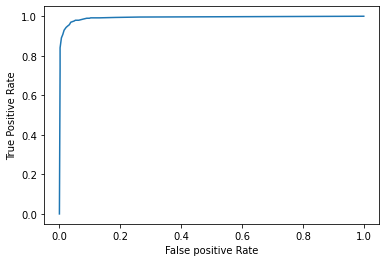

In [51]:
# plotting AUC_ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')

In [52]:
roc_auc_score(y_test, m_prob)

0.9924698128084054

## Random Forest Classification
- Random forest is a type of supervised machine learning algorithm based on ensemble learning. Ensemble learning is a type of learning where you join different types of algorithms or same algorithm multiple times to form a more powerful prediction model.
- The random forest algorithm can be used for both regression and classification tasks.

In [76]:
## import the RFC from sklearn

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=40)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=40)

In [77]:
##prediction on train data
##syntax:objname.ppredict(input_values)
y_pred_train=rfc.predict(X_train)

from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1127
           1       0.99      0.98      0.98      1090

    accuracy                           0.98      2217
   macro avg       0.98      0.98      0.98      2217
weighted avg       0.98      0.98      0.98      2217



In [78]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       457
           1       0.98      0.98      0.98       494

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951



In [82]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc_auc = roc_auc_score(y_test,rfc.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,rfc.predict_proba(X_test) [:,1])

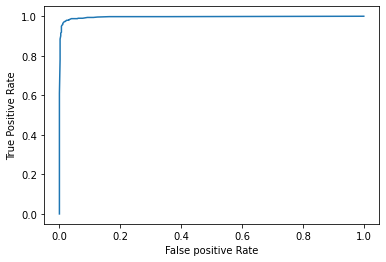

In [83]:
plt.figure()
plt.plot(fpr,tpr,roc_auc)
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [84]:
roc_auc

0.9780893700333987

## cross validation
- Cross-validation is a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data. Use cross-validation to detect overfitting, ie, failing to generalize a pattern.

In [85]:
from sklearn.model_selection import cross_val_score
cross_val_score(rfc,X_train,y_train,cv=5)

array([0.97972973, 0.96846847, 0.97742664, 0.98194131, 0.97968397])

1.KNeighbors Classifier:
- Training accuracy =0.97

- Testing accuracy =0.96

- AUC_ROC -> =0.49

2.Decision Tree Classifier:
- Training accuracy =0.99

- Testing accuracy =0.97

- AUC_ROC -> =0.99

3.Random Forest Classifier:
- Training accuracy =0.98

- Testing accuracy =0.98

- AUC_ROC -> =0.97

### From the above observation Decision tree classifier is best model to predict the given problem statement

## GRADIENT BOOSTING

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
gdc = GradientBoostingClassifier()
gdc.fit(X_train,y_train)

GradientBoostingClassifier()

In [65]:
y_pred_train = gdc.predict(X_train)
y_pred_train

array([0, 1, 0, ..., 1, 1, 1])

Text(33.0, 0.5, 'True Positive')

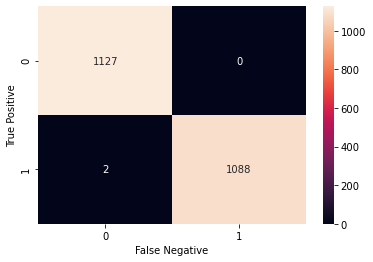

In [66]:
from sklearn.metrics import confusion_matrix,classification_report
sns.heatmap(confusion_matrix(y_train,y_pred_train),annot=True,fmt='d')
plt.xlabel('False Negative')
plt.ylabel('True Positive')

In [67]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1127
           1       1.00      1.00      1.00      1090

    accuracy                           1.00      2217
   macro avg       1.00      1.00      1.00      2217
weighted avg       1.00      1.00      1.00      2217



In [68]:
y_pred_test = gdc.predict(X_test)
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,

Text(33.0, 0.5, 'True Positive')

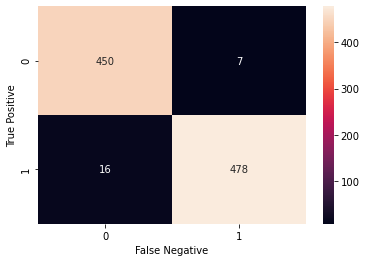

In [69]:
from sklearn.metrics import confusion_matrix,classification_report
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True,fmt='d')
plt.xlabel('False Negative')
plt.ylabel('True Positive')

In [70]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       457
           1       0.99      0.97      0.98       494

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951



In [71]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc_auc = roc_auc_score(y_test,gdc.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,gdc.predict_proba(X_test) [:,1])

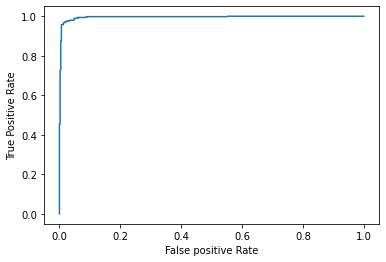

In [72]:
plt.figure()
plt.plot(fpr,tpr,roc_auc)
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [73]:
roc_auc

0.976147024690155